In [2]:
#Song classification

In [3]:
def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma') or (param == 'd'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

In [4]:
# Loading the training data
#import pandas as pda
# Loading feature names
#feature_names = pda.read_csv('bb_2000s_train.csv', delimiter=',', dtype='str')[0,3:]
#print(feature_names)
#M = np.genfromtxt('bb_2000s_train.csv', delimiter=',')
#y_trn = M[1:, -1]
#X_trn = M[1:, 3:]
# Loading the test data
#M = np.genfromtxt('bb_2000s_test.csv', delimiter=',')
#y_tst = M[1:, -1]
#X_tst = M[1:, 3:]


In [5]:
# Loading the training data
import pandas as pda
# Loading feature names
train_df = pda.DataFrame(pda.read_csv('bb_2000s_train.csv'))
#train_df.head()
y = train_df["Label"]
#print(y)
X = train_df.iloc[:,3:-1]
feature_names = X.columns
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
print(np.shape(X_val))

(568, 12)


In [6]:
# Loading the testing data
import pandas as pda
X_test_pred = pda.DataFrame(pda.read_csv('bb_2000s_test.csv'))
print(np.shape(X_test_pred))

(211, 12)


In [7]:
# Building pipeline if useful for song prediction
import numpy as np
from sklearn.preprocessing import StandardScaler
#import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score

SVparam_grid = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,1],'C': [0.1,1,10,]},
                {'kernel': ['linear'], 'C': [0.1,1,10]}]
LRparam_grid = [{'C': np.power(10.0, np.arange(-1.0, 2.0, 1.0))}]
DTparam_grid = [{'max_depth': np.arange(3, 16, dtype='int')}]
kNNparam_grid = [{'n_neighbors': np.arange(3, 16, dtype='int')}]
RFparam_grid = [{'max_depth': np.arange(1, 8, dtype='int')}]
xGBparam_grid = [{'max_depth': np.arange(1, 18, dtype='int')}]

LRpipeline = Pipeline([('transformer', StandardScaler()),
                       ('model_selection',GridSearchCV(LogisticRegression(solver='lbfgs'),LRparam_grid, cv=10))])
DTpipeline = Pipeline([('transformer', StandardScaler()),
                       ('model_selection',GridSearchCV(DecisionTreeClassifier(criterion='entropy'),DTparam_grid, cv=10))]) 
kNNpipeline= Pipeline([('transformer', StandardScaler()),
                       ('model_selection',GridSearchCV(KNeighborsClassifier(),kNNparam_grid, cv=10))])
RFpipeline = Pipeline([('transform', StandardScaler()),
                       ('model_selection',GridSearchCV(RandomForestClassifier(n_estimators=500),RFparam_grid, cv=5))])
SVpipeline = Pipeline([('transformer', StandardScaler()),
                       ('model_selection',GridSearchCV(SVC(probability=True),SVparam_grid, cv=10))])

NBpipeline = Pipeline([('transformer', StandardScaler()),('model_selection',MultinomialNB())])

# create a DMatrix for X_train and X_test
#dm_train = xgb.DMatrix(data=X_train, label=y_train)
#dm_val = xgb.DMatrix(data=X_val, label=y_val)
#params = {'objective' : 'binary:logistic', 'silent': 1}
# train the model using the training DMatrix
#xg_model = xgb.train(params=params, dtrain=dm_train, num_boost_round=100)#, evals=watch_list)
#xGBpipeline = Pipeline([('transform', StandardScaler()),('model_selection',GridSearchCV((),xGBparam_grid, cv=5))])
#print('Accuracy Score: {}'.format(accuracy_score(y_val, xg_model.predict(dm_val))))

#SV_pline=SVpipeline.fit(X_train, y_train) 
#kNN_pline=kNNpipeline.fit(X_train, y_train) 
#LR_pline=LRpipeline.fit(X_train, y_train) 
#DT_pline=DTpipeline.fit(X_train, y_train)
RF_pline=RFpipeline.fit(X_train, y_train) 
#xGB_pline=RFpipeline.fit(X_train, y_train) 

#NBpipeline.fit(X_train,y_train)
#print(classification_report(y_val, NBpipeline.predict(X_val)))
#print('Accuracy score: {}'.format(accuracy_score(y_val, NBpipeline.predict(X_val))))

#print(DT_pline.named_steps.model_selection.cv_results_)

#DTGSCV_model=DT_pline.named_steps.model_selection.best_estimator_
#print(DT_pline.predict(X_test))

#print('Suport Vector Machine')
#print('Accuracy score: {}'.format(accuracy_score(y_val, SVpipeline.predict(X_val))))
#print(classification_report(y_val, SVpipeline.predict(X_val)))
#print('best parameter',SV_pline.named_steps.model_selection.best_params_)

#print('Decision tree classification report')
#print('Accuracy score: {}'.format(accuracy_score(y_val, DTpipeline.predict(X_val))))
#print('best parameter',DT_pline.named_steps.model_selection.best_params_)
#print(classification_report(y_val, DTpipeline.predict(X_val)))

#print('Logistic Regression classification report')
#print('Accuracy score: {}'.format(accuracy_score(y_val, LRpipeline.predict(X_val))))
#print(classification_report(y_val, LRpipeline.predict(X_val)))
#print('best parameter',LR_pline.named_steps.model_selection.best_params_)

#print('k-nearest neighbours')
#print('Accuracy score: {}'.format(accuracy_score(y_val, kNNpipeline.predict(X_val))))
#print(classification_report(y_val, kNNpipeline.predict(X_val)))
#print('best parameter',kNN_pline.named_steps.model_selection.best_params_)

print('Random Forest')
print('Accuracy score: {}'.format(accuracy_score(y_val, RFpipeline.predict(X_val))))
print(classification_report(y_val, RFpipeline.predict(X_val)))
print('best parameter',RF_pline.named_steps.model_selection.best_params_)

#print('Gradient Boost')
#print('Accuracy score: {}'.format(accuracy_score(y_val, xGBpipeline.predict(X_val))))


C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Random Forest
Accuracy score: 0.8098591549295775
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       359
           1       0.78      0.67      0.72       209

   micro avg       0.81      0.81      0.81       568
   macro avg       0.80      0.78      0.79       568
weighted avg       0.81      0.81      0.81       568

best parameter {'max_depth': 7}


C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Saket\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [26]:
import numpy as np
y_test_pred = SVpipeline.predict(X_test_pred)
y_final=(y_test_pred).astype(np.int64)
print(y_final)
np.savetxt('predictions.txt', y_final, fmt='%d', delimiter='\n', encoding=None)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1]


D:\Py\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [27]:
#Tree visualisation
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/WinGraphviz'

#
# DO NOT EDIT CODE BELOW
#
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

export_graphviz(DTGSCV_model)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])
Image(filename='tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'

D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
D:\Py\lib\site-packages\sklearn\pipeline.py:381: DataCo

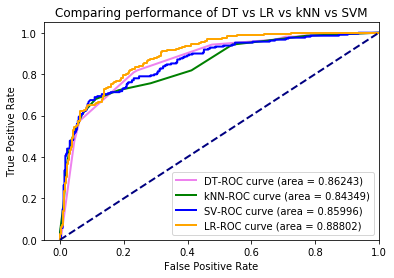

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score,auc
LR_auroc=roc_auc_score(y_val,LRpipeline.predict_proba(X_val)[:,1])
RF_auroc=roc_auc_score(y_val,LRpipeline.predict_proba(X_val)[:,1])
#GB_auroc=roc_auc_score(y_val,LRpipeline.predict_proba(X_val)[:,1])
NB_auroc=roc_auc_score(y_val,NBpipeline.predict_proba(X_val)[:,1])
DT_auroc=roc_auc_score(y_val,DTpipeline.predict_proba(X_val)[:,1])
kNN_auroc=roc_auc_score(y_val,kNNpipeline.predict_proba(X_val)[:,1])
SV_auroc=roc_auc_score(y_val,SVpipeline.predict_proba(X_val)[:,1])
LR_fpr = dict()
LR_tpr = dict()
#RF_fpr = dict()
#RF_tpr = dict()
#GB_fpr = dict()
#GB_tpr = dict()
kNN_fpr = dict()
kNN_tpr = dict()
SV_fpr = dict()
SV_tpr = dict()
DT_fpr = dict()
DT_tpr = dict()
#RF_roc_auc = dict()
#GB_roc_auc = dict()
DT_roc_auc = dict()
LR_roc_auc = dict()
kNN_roc_auc = dict()
SV_roc_auc = dict()
#RF_pp=LRpipeline.predict(X_val)[:,1]
#GB_pp=LRpipeline.predict(X_val)[:,1]
LR_pp=LRpipeline.predict_proba(X_val)[:,1]
DT_pp=DTpipeline.predict_proba(X_val)[:,1]
kNN_pp=kNNpipeline.predict_proba(X_val)[:,1]
SV_pp=SVpipeline.predict_proba(X_val)[:,1]

SV_fpr[1], SV_tpr[1],thresholds = roc_curve(y_val, SV_pp)
SV_roc_auc[1] = auc(SV_fpr[1], SV_tpr[1])

kNN_fpr[1], kNN_tpr[1],thresholds = roc_curve(y_val, kNN_pp)
kNN_roc_auc[1] = auc(kNN_fpr[1], kNN_tpr[1])

#RF_fpr[1], RF_tpr[1],thresholds = roc_curve(y_val, RF_pp)
#RF_roc_auc[1] = auc(RF_fpr[1], RF_tpr[1])

#GB_fpr[1], GB_tpr[1],thresholds = roc_curve(y_val, GB_pp)
#GB_roc_auc[1] = auc(GB_fpr[1], GB_tpr[1])

LR_fpr[1], LR_tpr[1],thresholds = roc_curve(y_val, LR_pp)
LR_roc_auc[1] = auc(LR_fpr[1], LR_tpr[1])

DT_fpr[1], DT_tpr[1],thresholds = roc_curve(y_val, DT_pp)
DT_roc_auc[1] = auc(DT_fpr[1], DT_tpr[1])


#The following plotting script was taken from the scikitlearn's ROC documentation
plt.figure()
lw = 2
plt.plot(DT_fpr[1],DT_tpr[1], color='violet',lw=lw, label='DT-ROC curve (area = %0.5f)' % DT_roc_auc[1])
#plt.plot(RF_fpr[1],RF_tpr[1], color='red',lw=lw, label='RF-ROC curve (area = %0.5f)' % RF_roc_auc[1])
#plt.plot(GB_fpr[1],GB_tpr[1], color='blue',lw=lw, label='GB-ROC curve (area = %0.5f)' % GB_roc_auc[1])
plt.plot(kNN_fpr[1],kNN_tpr[1], color='green',lw=lw, label='kNN-ROC curve (area = %0.5f)' % kNN_roc_auc[1])
plt.plot(SV_fpr[1],SV_tpr[1], color='blue',lw=lw, label='SV-ROC curve (area = %0.5f)' % SV_roc_auc[1])
plt.plot(LR_fpr[1],LR_tpr[1], color='orange',lw=lw, label='LR-ROC curve (area = %0.5f)' % LR_roc_auc[1])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing performance of DT vs LR vs kNN vs SVM')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)